### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
application_df.INCOME_AMT.value_counts()

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = application_df.drop(["EIN","NAME"], axis=1)
df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [4]:
df.columns

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'STATUS', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS',
       'ASK_AMT', 'IS_SUCCESSFUL'],
      dtype='object')

In [5]:
# Determine the number of unique values in each column.
for c in df.columns:
    print(df[{c}].nunique())


APPLICATION_TYPE    17
dtype: int64
AFFILIATION    6
dtype: int64
CLASSIFICATION    71
dtype: int64
USE_CASE    5
dtype: int64
ORGANIZATION    4
dtype: int64
STATUS    2
dtype: int64
INCOME_AMT    9
dtype: int64
SPECIAL_CONSIDERATIONS    2
dtype: int64
ASK_AMT    8747
dtype: int64
IS_SUCCESSFUL    2
dtype: int64


In [6]:
# Look at APPLICATION_TYPE value counts for binning
APP_Type= pd.DataFrame(df.APPLICATION_TYPE.value_counts())
APP_Type.rename(columns={'APPLICATION_TYPE':'Count'}, inplace=True)
APP_Type

,Count
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156
T13,66


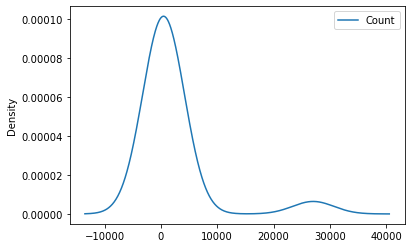

In [7]:
# Visualize the value counts of APPLICATION_TYPE
ax = APP_Type.plot.kde()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = APP_Type[APP_Type['Count']<700]
replace_application = replace_application.index

# Replace in dataframe
for app in replace_application:
    df.APPLICATION_TYPE = df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
Other      804
T8         737
T7         725
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
Class= pd.DataFrame(df.CLASSIFICATION.value_counts())
Class.rename(columns={'CLASSIFICATION':'Count'}, inplace=True)
Class.head(20)

,Count
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116
C1270,114


<AxesSubplot:ylabel='Density'>

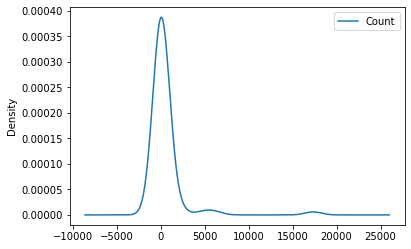

In [10]:
# Visualize the value counts of CLASSIFICATION
Class.plot.kde()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = Class[Class['Count']<700]
replace_class = replace_class.index

# Replace in dataframe
for cls in replace_class:
    df.CLASSIFICATION = df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [14]:
# Affiliation reduction
replace_affs = ['Family/Parent', 'National', 'Regional']
# Replace in dataframe
for affs in replace_affs:
    df.AFFILIATION = df.AFFILIATION.replace(affs,"Other")
    
# Check to make sure binning was successful
df.AFFILIATION.value_counts()

Independent         18480
CompanySponsored    15705
Other                 114
Name: AFFILIATION, dtype: int64

In [15]:
# Income reduction
OverMil = ['1M-5M', '10M-50M', '5M-10M', '50M+']

for inc in OverMil:
    df.INCOME_AMT = df.INCOME_AMT.replace(inc, "1M+")

df.INCOME_AMT.value_counts()


0                24388
25000-99999       3747
100000-499999     3374
1M+               1519
1-9999             728
10000-24999        543
Name: INCOME_AMT, dtype: int64

In [16]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,AFFILIATION_Independent,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M+,INCOME_AMT_25000-99999,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df.head()

C:\Users\amber\.conda\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M+,INCOME_AMT_25000-99999,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [18]:
df.SPECIAL_CONSIDERATIONS_N.value_counts()

1.0    34272
0.0       27
Name: SPECIAL_CONSIDERATIONS_N, dtype: int64

In [19]:
# Split our preprocessed data into our features and target arrays
y = df.IS_SUCCESSFUL
X = df.drop(columns=["IS_SUCCESSFUL", "STATUS", "SPECIAL_CONSIDERATIONS_N", "SPECIAL_CONSIDERATIONS_Y"])
X

,ASK_AMT,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_1M+,INCOME_AMT_25000-99999
0,5000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,108590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,6692,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,142590,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34297,5000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
X.columns

Index(['ASK_AMT', 'APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T19',
       'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5',
       'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Independent',
       'AFFILIATION_Other', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_Other',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_1M+', 'INCOME_AMT_25000-99999'],
      dtype='object')

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 40
# hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# third hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                2800      
                                                                 
 dense_4 (Dense)             (None, 40)                3240      
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 6,081
Trainable params: 6,081
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [29]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= (5*804))

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50, callbacks = [cp_callback])

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5669 - accuracy: 0.7222
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7303
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5502 - accuracy: 0.7290
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5481 - accuracy: 0.7302
Epoch 5/50
772/804 [===========================>..] - ETA: 0s - loss: 0.5471 - accuracy: 0.7321
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5471 - accuracy: 0.7318
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5468 - accuracy: 0.7321
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.7323
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5450 - accuracy: 0.7334
Epoch 9/50
804/804 [==============================] - 1s 1ms/s

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5550 - accuracy: 0.7333 - 302ms/epoch - 1ms/step
Loss: 0.5549939870834351, Accuracy: 0.7332944869995117


24 / 12 - relu
268/268 - 0s - loss: 0.5567 - accuracy: 0.7313 - 327ms/epoch - 1ms/step
Loss: 0.5566957592964172, Accuracy: 0.7313119769096375

8 / 4 - relu
268/268 - 0s - loss: 0.5570 - accuracy: 0.7285 - 292ms/epoch - 1ms/step
Loss: 0.556972324848175, Accuracy: 0.7285131216049194

8 / 4 tanh
268/268 - 0s - loss: 0.5567 - accuracy: 0.7319 - 308ms/epoch - 1ms/step
Loss: 0.556707501411438, Accuracy: 0.7318950295448303

8 / 4 relu  - tanh
268/268 - 0s - loss: 0.5575 - accuracy: 0.7313 - 283ms/epoch - 1ms/step
Loss: 0.5574699640274048, Accuracy: 0.7313119769096375

8 / 4 tanh - relu
268/268 - 0s - loss: 0.5598 - accuracy: 0.7269 - 275ms/epoch - 1ms/step
Loss: 0.5598369836807251, Accuracy: 0.7268804907798767

8 / 4 sigmoid - relu
268/268 - 0s - loss: 0.5554 - accuracy: 0.7285 - 275ms/epoch - 1ms/step
Loss: 0.5553529858589172, Accuracy: 0.7285131216049194

10 - relu
268/268 - 0s - loss: 0.5584 - accuracy: 0.7310 - 280ms/epoch - 1ms/step
Loss: 0.5584138035774231, Accuracy: 0.7309620976448059

10 / 5 relu -
268/268 - 0s - loss: 0.5598 - accuracy: 0.7278 - 279ms/epoch - 1ms/step
Loss: 0.5598002672195435, Accuracy: 0.7278134226799011

16 / 8 / 4 - relu
268/268 - 0s - loss: 0.5553 - accuracy: 0.7312 - 297ms/epoch - 1ms/step
Loss: 0.5553039312362671, Accuracy: 0.731195330619812

16 /8 / 4 - relu - tanh - relu
268/268 - 0s - loss: 0.5575 - accuracy: 0.7280 - 295ms/epoch - 1ms/step
Loss: 0.5574865341186523, Accuracy: 0.7280466556549072

24 / 12 / 6 - relu
268/268 - 0s - loss: 0.5563 - accuracy: 0.7321 - 302ms/epoch - 1ms/step
Loss: 0.556339681148529, Accuracy: 0.7321282625198364

36 / 18 / 9 - relu
268/268 - 0s - loss: 0.5608 - accuracy: 0.7325 - 298ms/epoch - 1ms/step
Loss: 0.5607543587684631, Accuracy: 0.732478141784668

36 / 18 - relu
268/268 - 0s - loss: 0.5587 - accuracy: 0.7322 - 280ms/epoch - 1ms/step
Loss: 0.5587205290794373, Accuracy: 0.7322449088096619

48 / 24 / 12 - relu
268/268 - 0s - loss: 0.5598 - accuracy: 0.7280 - 313ms/epoch - 1ms/step
Loss: 0.55977463722229, Accuracy: 0.7280466556549072

48 / 24 - relu - softmax
268/268 - 0s - loss: 0.5612 - accuracy: 0.7284 - 294ms/epoch - 1ms/step
Loss: 0.5611607432365417, Accuracy: 0.728396475315094

24 / 12 - softmax
268/268 - 0s - loss: 0.5558 - accuracy: 0.7324 - 292ms/epoch - 1ms/step
Loss: 0.5558037757873535, Accuracy: 0.7323614954948425

80 / 40 - relu
268/268 - 0s - loss: 0.5594 - accuracy: 0.7326 - 292ms/epoch - 1ms/step
Loss: 0.5593967437744141, Accuracy: 0.7325947284698486

100 / 50
268/268 - 0s - loss: 0.5578 - accuracy: 0.7312 - 291ms/epoch - 1ms/step
Loss: 0.5578067898750305, Accuracy: 0.731195330619812

60 / 30 - relu
268/268 - 0s - loss: 0.5555 - accuracy: 0.7326 - 293ms/epoch - 1ms/step
Loss: 0.5554905533790588, Accuracy: 0.7325947284698486
